# TuLiP Example: Animal Herding

In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import networkx as nx

from tulip import transys, spec, synth, dumpsmach, gridworld

## Construct a gridworld for the robot

/home/petter/.venvs/py2env/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:124: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/petter/.venvs/py2env/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:520: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/petter/.venvs/py2env/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:541: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/petter/.venvs/py2env/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:722: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(

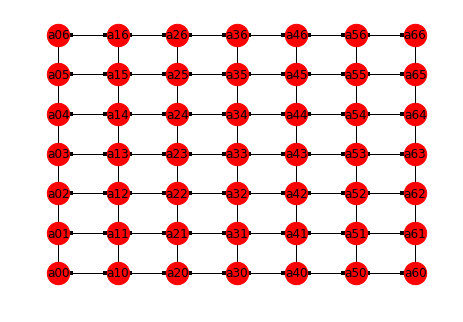

In [2]:
W = 7   # with of gridworld
H = 7   # height of gridworld

fts = transys.FTS()

# add nodes (state set X)
fts.add_nodes_from('a{}{}'.format(i,j) for i in range(W) for j in range(H))

# add actions (input set U)
fts.sys_actions.add_from(['north', 'west', 'south', 'east'])

# add transitions
for i in range(W):
    for j in range(H):
        fts.add_edge( 'a{}{}'.format(i,j), 'a{}{}'.format(i,min(H-1,j+1)), sys_actions='north')
        fts.add_edge( 'a{}{}'.format(i,j), 'a{}{}'.format(i,max(0,  j-1)), sys_actions='south')
        fts.add_edge( 'a{}{}'.format(i,j), 'a{}{}'.format(min(W-1, i+1),j), sys_actions='east')
        fts.add_edge( 'a{}{}'.format(i,j), 'a{}{}'.format(max(0,   i-1),j), sys_actions='west')

# draw with networkx
pos = dict()
for i in range(W):
    for j in range(H):
        pos['a{}{}'.format(i,j)] = (i,j)
        
nx.draw(fts, with_labels=True, arrows=True, node_size=500, pos = pos)

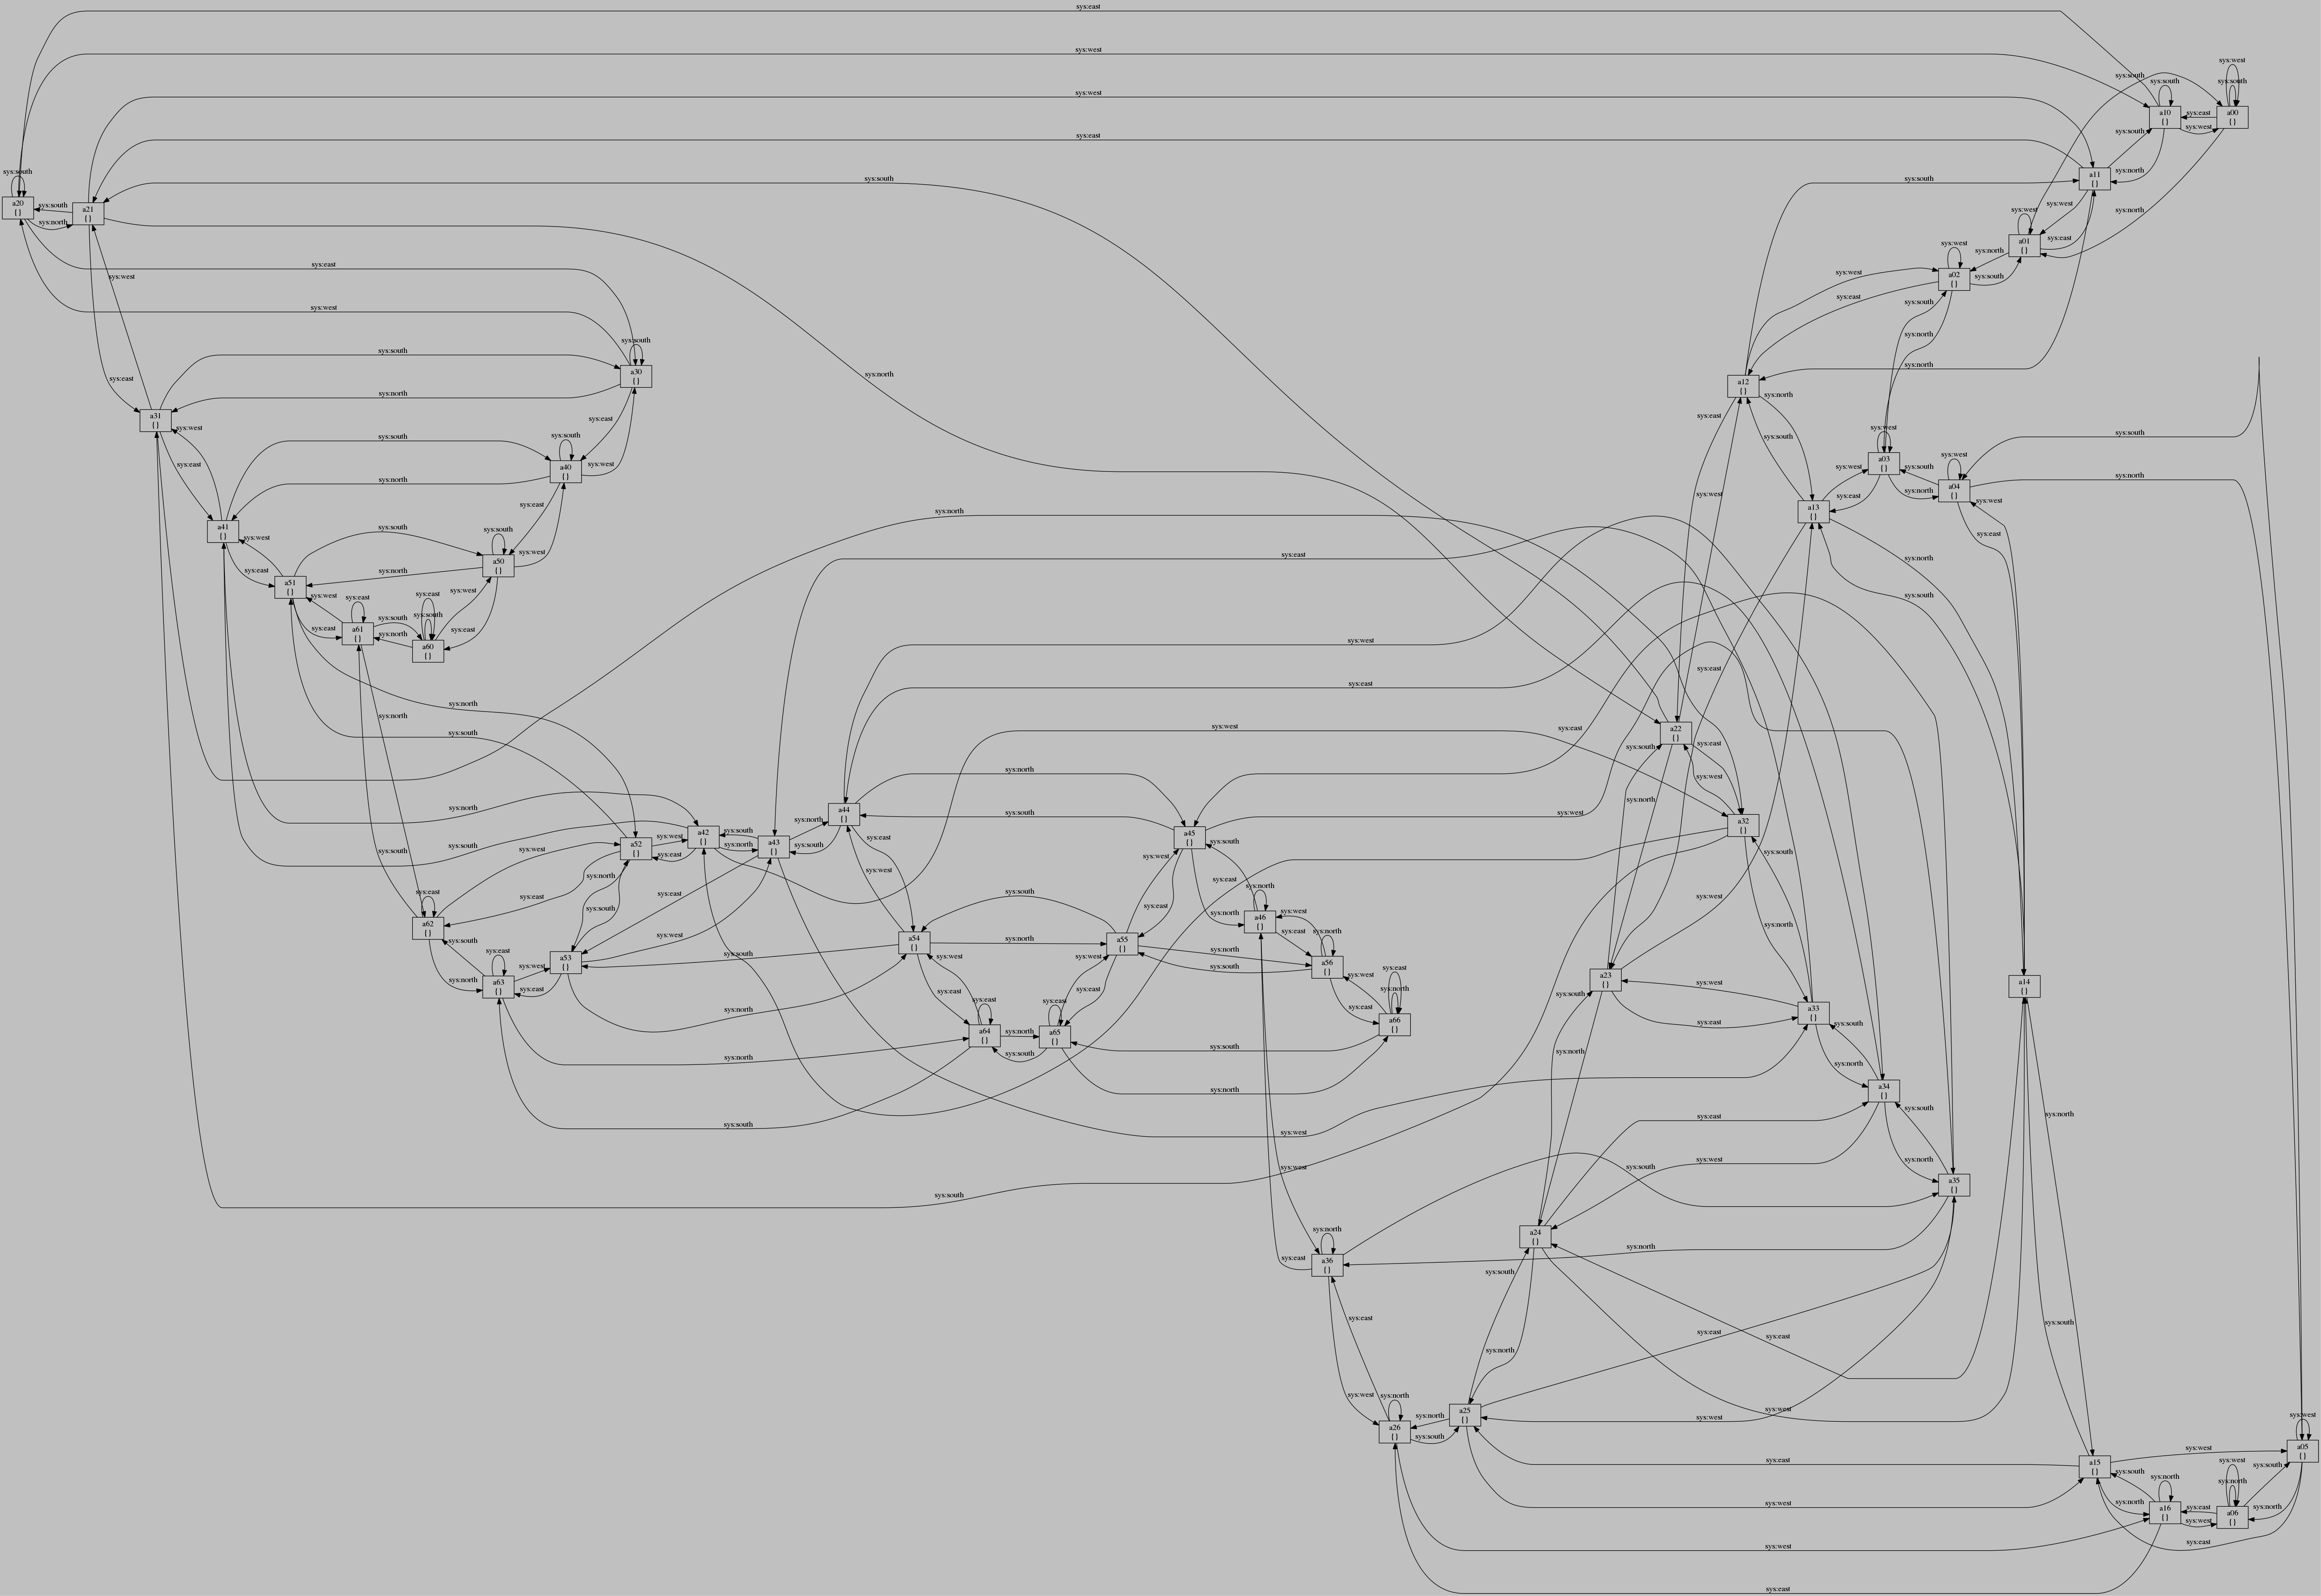

True

In [3]:
# draw with tulip
fts.plot()

## Define atomic propositions and specification

In [4]:
# Add atomic propositions
fts.atomic_propositions.add_from({'blocked'})

# define blocked states
blocked_list = ['a01', 'a06', 'a14', 'a21', 'a23', 'a33', 'a36', 'a40', 'a45', 'a46', 'a55', 'a63', 'a66']
for state in blocked_list:
    fts.add_node(state, ap = {'blocked'})

# define initial states
fts.states.initial.add_from(set(fts.nodes()) - set(blocked_list))

# Formula
env_vars = {'dog', 'cat', 'mouse'}
sys_vars = {'bone', 'yarn', 'flute'}
sys_safe = {'! blocked'}
formula = spec.GRSpec(env_vars=env_vars, 
                      sys_vars=sys_vars, sys_safety=sys_safe)

print(formula.pretty())

ENVIRONMENT VARIABLES:
	mouse	boolean
	dog	boolean
	cat	boolean

SYSTEM VARIABLES:
	flute	boolean
	bone	boolean
	yarn	boolean

FORMULA:
ASSUMPTION:
GUARANTEE:
    SAFETY
	  [](! blocked)



## Solve synthesis problem

In [5]:
# Set formula parameters
formula.moore = False     # can not see next env state
formula.qinit = '\A \E'   # solve s.t. for all (\A) env initial conditions, there exists (\E) sys initial condition

fts.owner = 'env'

ctrl = synth.synthesize(formula, env=fts, solver='omega')

dumpsmach.write_python_case("herding_policy.py", ctrl, classname="HerdingPolicy")

removed 0 nodes from 289 total


## Simulation

In [9]:
from herding_policy import HerdingPolicy
C = HerdingPolicy()

loc = 'a00'

C = HerdingPolicy()

for i in range(20):
    
    # APs at current loc
    blocked = 'blocked' in fts.node[loc]['ap']

    cat = False
    dog = False
    mouse = False
    
    action = C.move(eloc=loc, blocked=blocked, cat=cat, dog=dog, mouse=mouse)['sys_actions']
    new_loc = [e[1] for e in fts.transitions.find(loc, with_attr_dict={'sys_actions':action})][0]

    print "moved from {} to {} using {}".format(loc, new_loc, action)
    
    loc = new_loc

moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
moved from a00 to a00 using west
